In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def estimate_price(mileage, theta0, theta1):
    return theta0 + (theta1 * mileage)

In [99]:
def predict(theta, x):
    xx = np.ones([x.shape[0], 2])
    xx[:,-1] = x
    y = xx.dot(theta)
    return y

In [100]:
def linear_regression(mileage, price, m, theta0, theta1, learning_rate, ntimes):
    m = float(m)
    x = mileage
    y = price
    mileage = (mileage-min(mileage))/(max(mileage)-min(mileage))
    price = (price-min(price))/(max(price)-min(price))
    for i in range(ntimes):
        hypothesis = estimate_price(mileage, theta0, theta1)
        tmp_theta0 = learning_rate * 1/m * sum(hypothesis - price)
        tmp_theta1 = learning_rate * 1/m * sum((hypothesis - price) * mileage)
        theta0 -= tmp_theta0
        theta1 -= tmp_theta1
    theta0 = theta0*(max(y)-min(y)) + min(y) + (theta1*min(x)*(min(y)-max(y)))/(max(x)-min(x))
    theta1 = theta1*(max(y)-min(y)) / (max(x)-min(x))
    return theta0, theta1

In [101]:
df = pd.read_csv('data.csv')
try:
    filename = "theta.txt"
    f = open(filename, "r")
    theta = np.zeros(2)
    theta[0] = float(f.readline())
    theta[1] = float(f.readline())
    f.close()
except:
    print(f"Error: \"{filename}\" file not found or wrong format.")
    exit(0)
x = np.array(df['km'])
y = np.array(df['price'])
mileage = x
price = y


[ 8.49959965e+03 -2.14489636e-02]


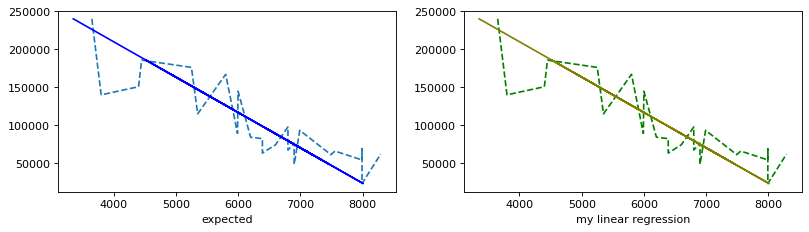

In [102]:
plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.plot(y, x, '--')
plt.plot(abline_values, x, 'b')
plt.xlabel('expected')

plt.subplot(1,2,2)
theta0, theta1 = linear_regression(mileage, price, mileage.size, theta[0], theta[1], 0.1, 10000)
theta[0] = theta0
theta[1] = theta1
print(theta)
yp = predict(theta, x)
plt.plot(y, x, '--', color='green')
plt.plot(yp, x, 'b', color='olive')
plt.xlabel('my linear regression')
plt.show()